# Interpolación

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import RegularGridInterpolator

In [2]:
df = pd.read_csv("dataframe2.csv")

In [3]:
# Paso 1: Definir las coordenadas únicas ordenadas
x_sorted = np.sort(df['x'].unique())
y_sorted = np.sort(df['y'].unique())
z_sorted = np.sort(df['z'].unique())

In [4]:
# Verifica que haya suficientes puntos únicos en cada dimensión para formar una cuadrícula
if len(x_sorted) < 2 or len(y_sorted) < 2 or len(z_sorted) < 2:
    raise ValueError("No hay suficientes valores únicos en las coordenadas x, y o z para una cuadrícula.")

In [5]:
# Paso 2: Generar puntos uniformemente distribuidos para interpolar
# Número de puntos a generar
n_points = 50000
points_new = np.column_stack((
    np.random.uniform(x_sorted.min(), x_sorted.max(), n_points),
    np.random.uniform(y_sorted.min(), y_sorted.max(), n_points),
    np.random.uniform(z_sorted.min(), z_sorted.max(), n_points)
))

In [6]:
# Paso 3: Interpolación trilineal para cada columna de energía
energy_columns = df.columns[3:]  # Ajusta esto si tus columnas de energía tienen otro rango
interpolated_energies = []

for column in energy_columns:
    # Crear una cuadrícula 3D completa para las energías
    grid_values = np.full(
        (len(x_sorted), len(y_sorted), len(z_sorted)), 
        np.nan
    )
    
    # Rellenar la cuadrícula con los valores correspondientes
    for _, row in df.iterrows():
        x_idx = np.where(x_sorted == row['x'])[0][0]
        y_idx = np.where(y_sorted == row['y'])[0][0]
        z_idx = np.where(z_sorted == row['z'])[0][0]
        grid_values[x_idx, y_idx, z_idx] = row[column]
    
    # Verifica si hay valores NaN en la cuadrícula
    if np.isnan(grid_values).any():
        raise ValueError(f"La cuadrícula 3D para la columna '{column}' contiene valores NaN.")

    # Crear el interpolador trilineal
    interpolator = RegularGridInterpolator(
        (x_sorted, y_sorted, z_sorted),  # Coordenadas ordenadas
        grid_values,  # Valores de energía
        bounds_error=False, fill_value=None  # Permitir extrapolación fuera de los límites
    )
    
    # Interpolar para los nuevos puntos
    interpolated_energy = interpolator(points_new)
    interpolated_energies.append(interpolated_energy)

In [7]:
# Paso 4: Crear un nuevo DataFrame con los resultados interpolados
result_df = pd.DataFrame(
    points_new, columns=['x', 'y', 'z']  # Coordenadas interpoladas
)

# Agregar las energías interpoladas como columnas
for i, column in enumerate(energy_columns):
    result_df[f'interpolated_{column}'] = interpolated_energies[i]

/tmp/ipykernel_4379/3794745808.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'interpolated_{column}'] = interpolated_energies[i]
/tmp/ipykernel_4379/3794745808.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'interpolated_{column}'] = interpolated_energies[i]
/tmp/ipykernel_4379/3794745808.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [8]:
# Mostrar el resultado
print(result_df.head())

          x         y         z  interpolated_valor_1  interpolated_valor_2  \
0 -0.413234 -0.018682 -0.498375                   0.0                   0.0   
1 -0.687883 -0.652243  0.983040                   0.0                   0.0   
2 -0.760292 -0.377043  0.157286                   0.0                   0.0   
3  0.857581  0.315940 -0.227104                   0.0                   0.0   
4 -0.263969  0.354225  0.431340                   0.0                   0.0   

   interpolated_valor_3  interpolated_valor_4  interpolated_valor_5  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   interpolated_valor_6  interpolated_valor_7  ...  interpolated_valor_191  \
0                   

In [9]:
result_df

,x,y,z,interpolated_valor_1,interpolated_valor_2,interpolated_valor_3,interpolated_valor_4,interpolated_valor_5,interpolated_valor_6,interpolated_valor_7,...,interpolated_valor_191,interpolated_valor_192,interpolated_valor_193,interpolated_valor_194,interpolated_valor_195,interpolated_valor_196,interpolated_valor_197,interpolated_valor_198,interpolated_valor_199,interpolated_valor_200
0,-0.413234,-0.018682,-0.498375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000361,0.000350,0.000339,0.000328,0.000318,0.000308,0.000299,0.000289,0.000280,0.000272
1,-0.687883,-0.652243,0.983040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000365,0.000354,0.000343,0.000332,0.000322,0.000312,0.000302,0.000293,0.000284,0.000275
2,-0.760292,-0.377043,0.157286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000360,0.000349,0.000338,0.000328,0.000318,0.000308,0.000298,0.000289,0.000280,0.000271
3,0.857581,0.315940,-0.227104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000377,0.000365,0.000354,0.000343,0.000332,0.000322,0.000312,0.000302,0.000293,0.000284
4,-0.263969,0.354225,0.431340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000373,0.000361,0.000350,0.000339,0.000329,0.000319,0.000309,0.000299,0.000290,0.000281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.012693,0.471961,-0.160544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000371,0.000360,0.000349,0.000338,0.000327,0.000317,0.000307,0.000298,0.000289,0.000280
49996,0.204604,-0.043558,-0.681364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000364,0.000353,0.000342,0.000332,0.000321,0.000311,0.000302,0.000292,0.000283,0.000274
49997,0.248758,-0.582523,-0.502666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000361,0.000350,0.000339,0.000329,0.000319,0.000309,0.000299,0.000290,0.000281,0.000272
49998,-0.181619,0.749936,-0.360718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000371,0.000359,0.000348,0.000337,0.000327,0.000316,0.000307,0.000297,0.000288,0.000279


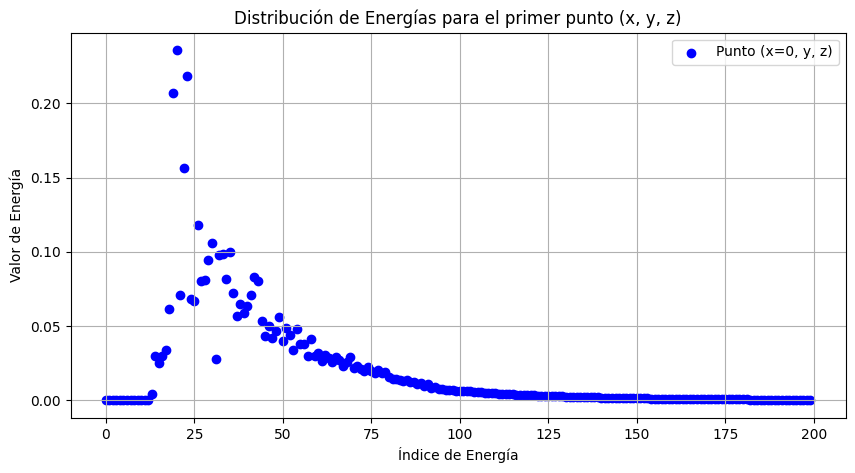

In [16]:
import matplotlib.pyplot as plt
import pandas as pd


# Seleccionar el primer punto
x_valor = df.loc[0, "x"]  # Coordenada X del primer punto
energias = df.iloc[0, 3:].values  # Valores de energía

# Graficar
plt.figure(figsize=(10, 5))
plt.scatter(range(len(energias)), energias, color='b', label=f"Punto (x={x_valor}, y, z)")
plt.xlabel("Índice de Energía")
plt.ylabel("Valor de Energía")
plt.title("Distribución de Energías para el primer punto (x, y, z)")
plt.legend()
plt.grid()
plt.show()


In [10]:
# Si deseas guardar los resultados en un archivo CSV
result_df.to_csv('interpolated_results.csv', index=False)